In [1]:
#Importando librerias

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [39]:
#Configurando las visualizaciones que quiero aplicar


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

In [3]:
#Leemos la base correspondiente 

autos = pd.read_csv('dnrpa-robos-feb.csv')

### Primeros conocimientos de la base 

In [4]:
#Formato de nuestra base

autos.shape

(2814, 25)

Nuestra base contiene 25 variables a analizar con 2814 casos

#### Esto significa que tenemos 2814 robos en lo que va de febrero en Argentina

In [6]:
#Columnas de nuestra base 

autos.columns

Index(['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_codigo', 'registro_seccional_descripcion',
       'registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_codigo',
       'automotor_tipo_descripcion', 'automotor_marca_codigo',
       'automotor_marca_descripcion', 'automotor_modelo_codigo',
       'automotor_modelo_descripcion', 'automotor_uso_codigo',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_localidad', 'titular_domicilio_provincia',
       'titular_genero', 'titular_anio_nacimiento', 'titular_pais_nacimiento',
       'titular_porcentaje_titularidad', 'titular_domicilio_provincia_id',
       'titular_pais_nacimiento_id'],
      dtype='object')

In [7]:
#Breve informacion de tipos de datos

autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2814 entries, 0 to 2813
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tramite_tipo                    2814 non-null   object 
 1   tramite_fecha                   2814 non-null   object 
 2   fecha_inscripcion_inicial       2814 non-null   object 
 3   registro_seccional_codigo       2814 non-null   int64  
 4   registro_seccional_descripcion  2814 non-null   object 
 5   registro_seccional_provincia    2814 non-null   object 
 6   automotor_origen                2814 non-null   object 
 7   automotor_anio_modelo           2810 non-null   float64
 8   automotor_tipo_codigo           2721 non-null   float64
 9   automotor_tipo_descripcion      2814 non-null   object 
 10  automotor_marca_codigo          2775 non-null   object 
 11  automotor_marca_descripcion     2814 non-null   object 
 12  automotor_modelo_codigo         27

Tenemos 7 variables numéricas y 15 variables categóricas

In [9]:
autos.isnull().sum().sum()

349

Tenemos 349 valores nulos en total en toda la base de datos, ubicados en las siguientes columnas 

In [13]:
autos.isnull().sum()

tramite_tipo                        0
tramite_fecha                       0
fecha_inscripcion_inicial           0
registro_seccional_codigo           0
registro_seccional_descripcion      0
registro_seccional_provincia        0
automotor_origen                    0
automotor_anio_modelo               4
automotor_tipo_codigo              93
automotor_tipo_descripcion          0
automotor_marca_codigo             39
automotor_marca_descripcion         0
automotor_modelo_codigo            43
automotor_modelo_descripcion        0
automotor_uso_codigo                0
automotor_uso_descripcion           0
titular_tipo_persona                0
titular_domicilio_localidad         3
titular_domicilio_provincia         0
titular_genero                      0
titular_anio_nacimiento             0
titular_pais_nacimiento             0
titular_porcentaje_titularidad      0
titular_domicilio_provincia_id      0
titular_pais_nacimiento_id        167
dtype: int64

In [14]:
#Primer vistazo a nuestra base 

autos.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-02-17,2011-04-19,1204,MALVINAS ARGENTINAS Nº 2 (EX. SAN MIGUEL NRO. 5),Buenos Aires,Nacional,2011.0,NaN,FURGON 800,...,Privado,Física,VILLA DE MAYO,BUENOS AIRES,Femenino,1982,ARGENTINA,100,6,ARG
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-02-23,1990-08-02,21059,ROSARIO Nº 16,Santa Fe,Nacional,1990.0,NaN,SEDAN,...,Privado,Física,ROSARIO,SANTA FE,Masculino,1970,ARGENTINA,100,82,ARG
2,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-02-15,1998-08-12,1150,AVELLANEDA Nº 3,Buenos Aires,Nacional,1998.0,NaN,MICROOMNIBUS,...,Público,Física,AVELLANEDA,BUENOS AIRES,Femenino,1958,ARGENTINA,100,6,ARG
3,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-02-23,1996-02-09,21070,ROSARIO Nº 18,Santa Fe,Nacional,1996.0,NaN,BERLINA 4 PTAS,...,Privado,Física,ROSARIO,SANTA FE,Masculino,1971,ARGENTINA,100,82,ARG
4,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-02-22,1999-12-23,4078,CORDOBA Nº 24,Córdoba,Nacional,1999.0,NaN,BERLINA 3 PTAS,...,Privado,Física,CORDOBA,CORDOBA,Femenino,1963,ARGENTINA,100,14,ARG


### Limpieza de datos

Se eliminan los datos correspondientes a columnas con valores nulos debido a la poca importancia que obtienen en el estudio general de robos de vehículos en Argentina.

In [17]:
# Se realiza la limpieza total de la base 

autos.dropna(inplace = True)

In [18]:
#Chequeamos que no tengamos valores nulos en nuestra base 

autos.isnull().sum()

tramite_tipo                      0
tramite_fecha                     0
fecha_inscripcion_inicial         0
registro_seccional_codigo         0
registro_seccional_descripcion    0
registro_seccional_provincia      0
automotor_origen                  0
automotor_anio_modelo             0
automotor_tipo_codigo             0
automotor_tipo_descripcion        0
automotor_marca_codigo            0
automotor_marca_descripcion       0
automotor_modelo_codigo           0
automotor_modelo_descripcion      0
automotor_uso_codigo              0
automotor_uso_descripcion         0
titular_tipo_persona              0
titular_domicilio_localidad       0
titular_domicilio_provincia       0
titular_genero                    0
titular_anio_nacimiento           0
titular_pais_nacimiento           0
titular_porcentaje_titularidad    0
titular_domicilio_provincia_id    0
titular_pais_nacimiento_id        0
dtype: int64

In [21]:
### Corregimos el valor de fecha para obtener resultados en un timeseries 

autos['tramite_fecha'] = pd.to_datetime(autos['tramite_fecha'])

### Primeros datos 

#### Cantidad de casos por día

In [54]:
robos_por_dia = autos.groupby('tramite_fecha')['titular_genero'].count().to_frame()

In [55]:
robos_por_dia.reset_index(inplace = True)

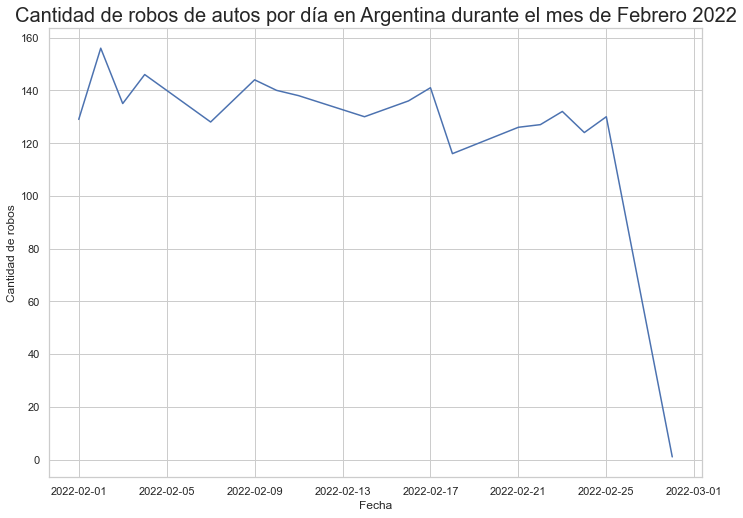

In [64]:
#Graficando casos diarios

sns.lineplot(data = robos_por_dia, x = "tramite_fecha", y = "titular_genero")
plt.title('Cantidad de robos de autos por día en Argentina durante el mes de Febrero 2022', fontsize = 20)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de robos')
plt.show()

Se observa un comportamiento extraño el dia 28 de febrero o la perdida en la carga de información por parte de la base de origen prevista por Datos.gob.ar

In [68]:
robos_por_dia.describe()

,titular_genero
count,20.000000
mean,127.400000
std,31.026983
min,1.000000
25%,127.750000
50%,132.500000
75%,138.500000
max,156.000000


. En Argentina se robaron en febrero unos **127** vehículos por día promedio </br>
. El valor máximo de robos se registró el **día 02 de febrero** con un valor de **156** vehículos por día 

### Cantidad de robos registrados por provincia

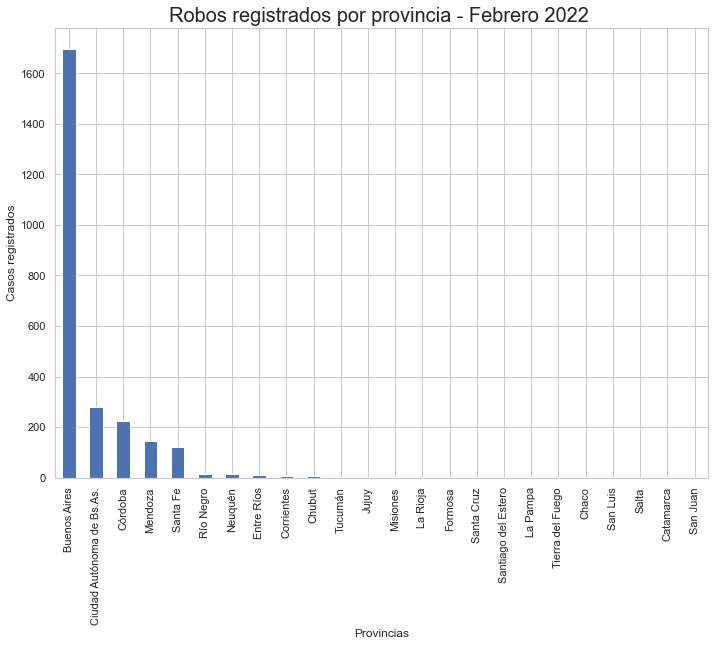

In [75]:
autos.registro_seccional_provincia.value_counts().plot.bar()
plt.title('Robos registrados por provincia - Febrero 2022 ', fontsize = 20)
plt.xlabel('Provincias')
plt.ylabel('Casos registrados')
plt.show()

Buenos Aires registra la mayor cantidad de casos con 1695 casos. Lo siguen CABA, Córdoba y Mendoza.

In [71]:
autos.registro_seccional_provincia.value_counts(normalize = True)

Buenos Aires                 0.665228
Ciudad Autónoma de Bs.As.    0.109105
Córdoba                      0.087127
Mendoza                      0.056907
Santa Fe                     0.047881
Río Negro                    0.005495
Neuquén                      0.005102
Entre Ríos                   0.003925
Corrientes                   0.003140
Chubut                       0.002355
Tucumán                      0.001570
Jujuy                        0.001570
Misiones                     0.001177
La Rioja                     0.001177
Formosa                      0.001177
Santa Cruz                   0.001177
Santiago del Estero          0.001177
La Pampa                     0.001177
Tierra del Fuego             0.000785
Chaco                        0.000785
San Luis                     0.000785
Salta                        0.000392
Catamarca                    0.000392
San Juan                     0.000392
Name: registro_seccional_provincia, dtype: float64

**Mendoza** ocupa el cuarto lugar con un 5.6% de los robos registrados en todo el país

### Modelos de autos robados en Argentina

In [92]:
autos['automotor_anio_modelo'].value_counts().head(5)

2013.0    153
2011.0    147
2012.0    145
2010.0    136
2008.0    135
Name: automotor_anio_modelo, dtype: int64

Los modelos más elegidos por los delincuentes durante febrero 2022 fueron los autos modelo 2013, 2011, 2012, 2010 y 2008. Los modelos actuales parecen no estar en la mira de los delincuentes. 

### Top 10 - Marcas de automóviles con mayor cantidad de robos

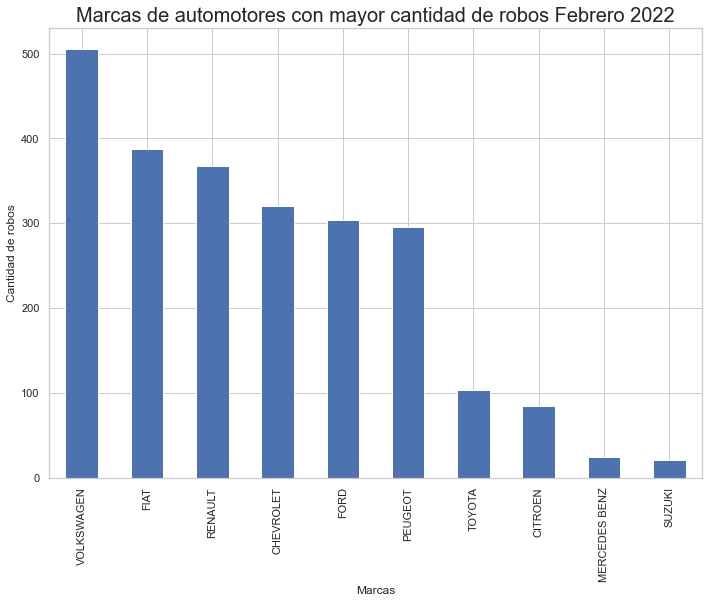

In [99]:
autos.automotor_marca_descripcion.value_counts().head(10).plot.bar()
plt.title('Marcas de automotores con mayor cantidad de robos Febrero 2022', fontsize= 20)
plt.xlabel("Marcas")
plt.ylabel('Cantidad de robos')
plt.show()

Sin duda algunas , la marca alemana VW lidera el ranking acompañado por FIAT y Renault que cierran el top 3. Lo siguen Chevrolet, Ford y Peugeot. 

### Los 10 autos más robados en Argentina durante febrero 2022

In [104]:
autos.automotor_modelo_descripcion.value_counts().head(10)

GOL 1.6                           47
GOL TREND 1.6                     35
FOX 1.6                           26
VOYAGE 1.6                        23
CLASSIC 4 P LS ABS+AIRBAG 1.4N    22
FIORINO FIRE 1242 MPI 8V          19
RENAULT 9 RL                      18
KA                                18
GOL GL                            17
GOL 1.4 L                         16
Name: automotor_modelo_descripcion, dtype: int64

1. Gol 1.6 Classic
2. Gol Trend 1.6 
3. Fox 1.6 
4. Voyage 1.6 
5. Corsa Classic 4p 
6. Fiorino Fire

Se observa la hegemonía de la marca alemana Volkswagen en el modelo de autos robados en Argentina durante febrero 2022

### Todo sobre las víctimas de robos en Argentina

In [108]:
autos.titular_genero.value_counts(normalize = True)

Masculino          0.527865
Femenino           0.272763
No identificado    0.199372
Name: titular_genero, dtype: float64

El **52%** de los robos registrados en Argentina, las víctimas son de género masculino. El **27%** son mujeres y el **19%** no se identificaron. 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


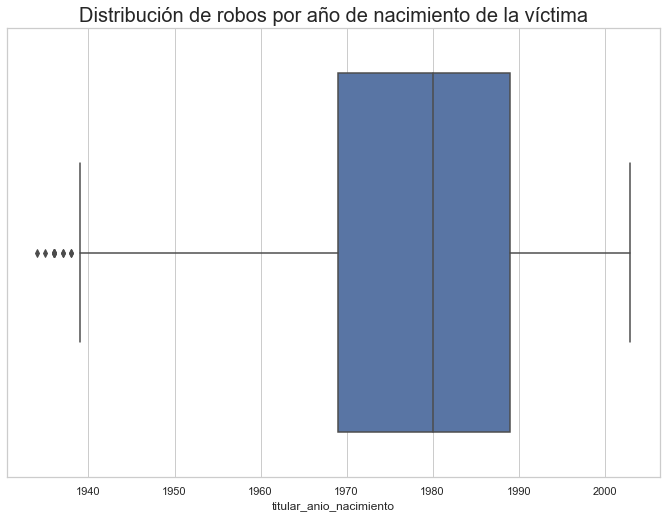

In [111]:
sns.boxplot(autos.titular_anio_nacimiento)
plt.title("Distribución de robos por año de nacimiento de la víctima", fontsize = 20);

Se observa que la concentración de robos se da en víctimas que tienen como año de nacimiento entre 1970 a 1990. Son casos ailsados los registrados a personas de tercera edad por debajo de 1940. 

## Mendoza 

### Autos más robados en Mendoza 

In [114]:
mendoza = autos[autos['registro_seccional_provincia'] == "Mendoza"]

In [116]:
mendoza.automotor_modelo_descripcion.value_counts().head(5)

KA                    3
VW SENDA              2
206 XRD PREMIUM 5P    2
GOL 1.4 L             2
GOL 1.6               2
Name: automotor_modelo_descripcion, dtype: int64

A diferencia de la Nación, en **Mendoza**, el **FORD KA** es el auto más robado durante febrero 2022 seguidos por el Peugeot 206 y VW Gol en sus diferentes modelos.  

In [118]:
mendoza.titular_genero.value_counts(normalize= True)

Masculino          0.468966
Femenino           0.351724
No identificado    0.179310
Name: titular_genero, dtype: float64

El género femenino es víctima por encima de los 8 puntos porcentuales si lo comparamos con el porcentaje arrojado en Argentina por lo que este género es seriamente perjudicado en la provincia. 

In [122]:
mendoza.titular_domicilio_localidad.value_counts(normalize= True).head(10)

GODOY CRUZ          0.096552
VILLA NUEVA         0.068966
LAS HERAS           0.062069
DORREGO             0.048276
RODEO DE LA CRUZ    0.034483
EL CHALLAO          0.034483
CIUDAD              0.034483
LUZURIAGA           0.027586
EL ZAPALLAR         0.027586
PANQUEHUA           0.027586
Name: titular_domicilio_localidad, dtype: float64

Godoy Cruz, Villa Nueva (Guaymallén) y Las Heras ciudad son las localidades con mayor cantidad de robos de automoviles en Mendoza. Lo siguen de cerca otras dos localidades de Guaymallén como Dorrego y Rodeo de la Cruz.